## Clustering

In this section we will try to find groups of clients or transactions. To do that, we will use PCA alongside KMeans. PCA is used to reduce the dimensionality of our features. KMeans was used to generate the clusters because it is a fast algorithm and it uses a stochastic approach that frequently works well.

In [16]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = pd.read_csv('../assets/final/data.csv')

In [17]:
# Splits data into N dimensions
def perform_pca(df, cols):
  # Scale data
  Sc = StandardScaler()
  X = df[cols].values
  X = Sc.fit_transform(X)

  # PCA
  pca = PCA(n_components=2, random_state=0)
  components = pca.fit_transform(X)
  print("Variance Ration", pca.explained_variance_ratio_)
  print("PCA Components: ", pca.components_)

  principalDf = pd.DataFrame(data = components, columns = ['principalComp1', 'principalComp2'])
  finalDf = pd.concat([principalDf, df[['paid']]], axis = 1)
  finalDf.head()

  # Plot PCA
  sb.scatterplot(data=finalDf, hue="paid", x="principalComp1", y="principalComp2")
  plt.show()
  return finalDf[["principalComp1", "principalComp2"]]


# Create 10 K-Mean models while varying the number of clusters (k)
# To get best k
def plotInertias(df):
    from sklearn.cluster import KMeans
    inertias = []
    for k in range(1,10):
        model = KMeans(n_clusters=k, random_state=0)
        # Fit model to samples
        model.fit(df.iloc[:,:3])
        # Append the inertia to the list of inertias
        inertias.append(model.inertia_)

    sb.lineplot(x=range(1,10), y=inertias)
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.show()

# Create N Clusters with given components
def plotClusters(df, N):
    from sklearn.cluster import KMeans
    # Split into clusters
    model = KMeans(n_clusters=N, random_state=0)
    model.fit(df.iloc[:,:2])

    labels = model.predict(df.iloc[:,:2])
    sb.scatterplot(data=df, x="principalComp1", y="principalComp2", hue=labels, palette=sb.color_palette("tab10", N))
    plt.show()

Variance Ration [0.17138524 0.13876836]
PCA Components:  [[-0.15105057 -0.07592105 -0.33066215 -0.28917603 -0.02806994  0.24477276
  -0.10688083  0.07458755  0.00801368 -0.32681315  0.26049683 -0.55836352
   0.46289477]
 [-0.19241719  0.01851561 -0.4559885  -0.22038971 -0.09758881 -0.14201048
  -0.20519153 -0.42229751  0.11478512 -0.47713475 -0.16306745  0.33626272
  -0.27479   ]]


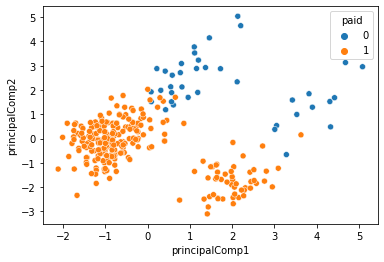

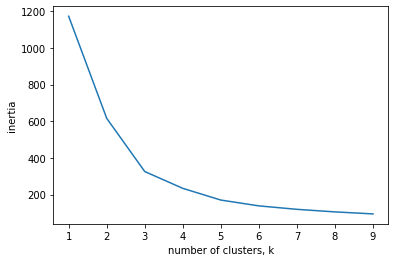

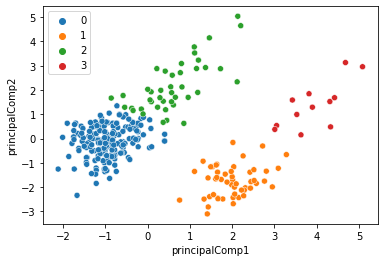

In [19]:
cols = ['is_co-owned', 'gender', 'a_district', 'a_region', 'a_avg_salary', 'payments',  'balance_min', 
  'balance_mean', 'age', 'paid', 'frequency_issuance after transaction', 'frequency_monthly issuance', 'frequency_weekly issuance']

X = data[cols].values
Y = data['paid'].values # Target

df = perform_pca(data, cols)
plotInertias(df)
plotClusters(df, 4)